In [90]:
# !pip install fastf1

In [1]:
import logging

logging.getLogger('fastf1').setLevel(logging.ERROR)

In [2]:
import fastf1
import pandas as pd
import numpy as np
from pathlib import Path
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

fastf1.Cache.enable_cache('cache')

# Loading data

Data - attributes from session <br>
[attr for attr in dir(session) if not attr.startswith('_')]

['api_path', <br>
 'car_data',<br>
 'date',<br>
 'drivers',<br>
 'event',<br>
 'f1_api_support',<br>
 'get_circuit_info',<br>
 'get_driver',<br>
 'laps',<br>
 'load',<br>
 'name',<br>
 'pos_data',<br>
 'race_control_messages',<br>
 'results',<br>
 'session_info',<br>
 'session_start_time',<br>
 'session_status',<br>
 't0_date',<br>
 'total_laps',<br>
 'track_status',<br>
 'weather_data']

In [93]:
# def append_df(df, path):
#     df.to_csv(path, mode='a', index=False, header=not path.exists())

In [94]:
# OUT = Path(r"C:\Users\Ogi\Desktop\Vezbanje\FON\Master rad\Aplikacija\data\Model2")
# OUT.mkdir(exist_ok=True)

In [95]:
# files = {
#     'laps': OUT / 'laps.csv',
#     'weather': OUT / 'weather.csv',
#     'track': OUT / 'track_status.csv',
#     'drivers': OUT / 'drivers.csv',
#     'events': OUT / 'events.csv'
# }

In [96]:
# for season in range(2020, 2025):
#     calendar = fastf1.get_event_schedule(season)

#     for _, row in calendar.iterrows():
#         try:
#             session = fastf1.get_session(season, row['EventName'], 'R')
    
#             session.load(
#                 telemetry=False,
#                 messages=False
#             )
    
#             # --- EVENT / TRACK INFO ---
#             event = session.event.copy()
#             event['Season'] = season
#             append_df(event, files['events'])
    
#             # --- DRIVERS ---
#             for drv in session.drivers:
#                 d = session.get_driver(drv)
#                 d['Season'] = season
#                 d['Round'] = row['RoundNumber']
#                 append_df(pd.DataFrame([d]), files["drivers"])
            
#             # --- LAPS ---
#             laps = session.laps.copy()
#             laps['Season'] = season
#             laps['Round'] = row['RoundNumber']
#             laps['EventName'] = row['EventName']
#             append_df(laps, files['laps'])
            
#             # --- WEATHER ---
#             if session.weather_data is not None:
#                 weather = session.weather_data.copy()
#                 weather['Season'] = season
#                 weather['Round'] = row['RoundNumber']
#                 append_df(weather, files['weather'])
    
#             # --- TRACK STATUS ---
#             if session.track_status is not None:
#                 ts = session.track_status.copy()
#                 ts['Season'] = season
#                 ts['Round'] = row['RoundNumber']
#                 append_df(ts, files['track'])

#             print(f"✅ {season} {row['EventName']}")
            
#         except Exception as e:
#             print(f"***Skipped {season} {row['EventName']}: {e}")

Skipped races: azerbajian, singapore, us, maxico, brazil, las vegas, qatar, abu dhabi in 2024.


In [3]:
df_drivers = pd.read_csv('data/Model2/drivers.csv').convert_dtypes()
df_laps = pd.read_csv('data/Model2/laps.csv').convert_dtypes()
df_track_status = pd.read_csv('data/Model2/track_status.csv').convert_dtypes()
df_weather = pd.read_csv('data/Model2/weather.csv').convert_dtypes()

C:\Users\Ogi\AppData\Local\Temp\ipykernel_11632\2993207287.py:2: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_laps = pd.read_csv('data/Model2/laps.csv').convert_dtypes()


In [4]:
for col in df_laps.select_dtypes(include=['string','boolean']).columns:
    if df_laps[col].dtype.name == 'boolean':
        df_laps[col] = df_laps[col].astype('float')
    else:
        df_laps[col] = df_laps[col].astype('object')

In [5]:
df_laps = df_laps.replace({pd.NA: np.nan})

# Understanding, refinig and clearing data

In [100]:
df_drivers.dtypes

DriverNumber                   Int64
BroadcastName         string[python]
Abbreviation          string[python]
DriverId              string[python]
TeamName              string[python]
TeamColor             string[python]
TeamId                string[python]
FirstName             string[python]
LastName              string[python]
FullName              string[python]
HeadshotUrl           string[python]
CountryCode           string[python]
Position                       Int64
ClassifiedPosition    string[python]
GridPosition                   Int64
Q1                             Int64
Q2                             Int64
Q3                             Int64
Time                  string[python]
Status                string[python]
Points                       Float64
Laps                           Int64
Season                         Int64
Round                          Int64
dtype: object

In [101]:
df_laps.dtypes

Time                   object
Driver                 object
DriverNumber            Int64
LapTime                object
LapNumber               Int64
Stint                   Int64
PitOutTime             object
PitInTime              object
Sector1Time            object
Sector2Time            object
Sector3Time            object
Sector1SessionTime     object
Sector2SessionTime     object
Sector3SessionTime     object
SpeedI1                 Int64
SpeedI2                 Int64
SpeedFL                 Int64
SpeedST                 Int64
IsPersonalBest        float64
Compound               object
TyreLife                Int64
FreshTyre             float64
Team                   object
LapStartTime           object
LapStartDate            Int64
TrackStatus             Int64
Position                Int64
Deleted                 Int64
DeletedReason           Int64
FastF1Generated       float64
IsAccurate            float64
Season                  Int64
Round                   Int64
EventName 

In [102]:
df_track_status.dtypes

Time       string[python]
Status              Int64
Message    string[python]
Season              Int64
Round               Int64
dtype: object

In [103]:
df_weather.dtypes

Time             string[python]
AirTemp                 Float64
Humidity                Float64
Pressure                Float64
Rainfall                boolean
TrackTemp               Float64
WindDirection             Int64
WindSpeed               Float64
Season                    Int64
Round                     Int64
dtype: object

<b>LAPS data</b> =======================================================================================================
<br>
Time: Time of going through the start line, for the current lap.<br>
Driver: VER, HAM... <br>
DriverNumber <br>
LapTime: Full time of lap ("1:23.456"). <b>Very important feature</b><br>
LapNumber: Number of lap. <b>VIF</b> <br>
Stint: It's a period of the race between pit stops. For example stint1->from race start to frist pit. stint2->from first pit to second, and so on. Every time when driver goes to pit, new stint create.<br>
PitOutTime            <br>
PitInTime             <br>
Sector1Time <b>VIF</b>          <br>
Sector2Time <b>VIF</b>         <br>
Sector3Time <b>VIF</b>        <br>
Sector1SessionTime: When the secotr is finished inside session. <br>
Sector2SessionTime    <br>
Sector3SessionTime    <br>
SpeedI1: Speed in intermediate point one. <br>
SpeedI2: Speed in intermediate point two. <br>
SpeedFL: Speed trap on finish line. <br>
SpeedST: Speed trap on fastest part of track. <br>
IsPersonalBest        <br>
Compound: Tyre type (soft, medium, hard, intermediate, wet). <b>VIF</b><br>
TyreLife: How many laps tyre has. <b>VIF</b><br>
FreshTyre: True if tyre is new. <b>VIF</b><br>
Team: Driver's team. <br>
LapStartTime: Time when lap is started. <br>
LapStartDate: Unix timestamp of lap start. <br>
TrackStatus: Status of the track (1 = green, 4 = safety car, 6 = flag red). <b>VIF</b><br>
Position: Position of driver at the end of lap. <b>VIF</b><br>
Deleted: Do lap is deleted (track limits, incident). 1 = invalid lap. <br>
DeletedReason         <br>
FastF1Generated       <br>
IsAccurate: Is current row is accurate. Maybe, need to be filtered. laps=laps[laps['IsAccurate']]. <br>
Season                <br>
Round                 <br>
EventName             
<br> =======================================================================================================

In [104]:
df_laps.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,Season,Round,EventName
0,0 days 00:34:06.302000,GAS,10,0 days 00:01:19.106000,1,1,NaN,NaN,NaN,0 days 00:00:33.352000,0 days 00:00:23.247000,NaN,0 days 00:33:43.079000,0 days 00:34:06.511000,309,217,274,290,0.0,MEDIUM,1,1.0,AlphaTauri,0 days 00:32:47.006000,<NA>,1,12,<NA>,<NA>,0.0,0.0,2020,0,Pre-Season Test 1
1,0 days 00:35:18.714000,GAS,10,0 days 00:01:12.412000,2,1,NaN,NaN,0 days 00:00:17.960000,0 days 00:00:32.228000,0 days 00:00:22.224000,0 days 00:34:24.262000,0 days 00:34:56.490000,0 days 00:35:18.714000,282,226,270,292,1.0,MEDIUM,2,1.0,AlphaTauri,0 days 00:34:06.302000,<NA>,1,12,<NA>,<NA>,0.0,1.0,2020,0,Pre-Season Test 1
2,0 days 00:36:30.025000,GAS,10,0 days 00:01:11.311000,3,1,NaN,NaN,0 days 00:00:17.513000,0 days 00:00:31.717000,0 days 00:00:22.081000,0 days 00:35:36.227000,0 days 00:36:07.944000,0 days 00:36:30.025000,307,224,277,311,1.0,MEDIUM,3,1.0,AlphaTauri,0 days 00:35:18.714000,<NA>,1,12,<NA>,<NA>,0.0,1.0,2020,0,Pre-Season Test 1
3,0 days 00:37:40.750000,GAS,10,0 days 00:01:10.725000,4,1,NaN,NaN,0 days 00:00:17.410000,0 days 00:00:31.510000,0 days 00:00:21.805000,0 days 00:36:47.435000,0 days 00:37:18.945000,0 days 00:37:40.750000,309,218,275,309,1.0,MEDIUM,4,1.0,AlphaTauri,0 days 00:36:30.025000,<NA>,1,12,<NA>,<NA>,0.0,1.0,2020,0,Pre-Season Test 1
4,0 days 00:38:52.261000,GAS,10,0 days 00:01:11.511000,5,1,NaN,NaN,0 days 00:00:17.464000,0 days 00:00:31.827000,0 days 00:00:22.220000,0 days 00:37:58.214000,0 days 00:38:30.041000,0 days 00:38:52.261000,303,219,268,296,0.0,MEDIUM,5,1.0,AlphaTauri,0 days 00:37:40.750000,<NA>,1,12,<NA>,<NA>,0.0,1.0,2020,0,Pre-Season Test 1


### Creating target

We are considering current lap. In this lap, we need to predict if driver will win, stay on the same position or lose position. So target values will be: 1 -> won position; 0 -> remained on same positon; -1 -> lost position.

In [6]:
df_laps = df_laps.sort_values(['Season', 'Round', 'EventName', 'Driver', 'LapNumber'])

df_laps['NextPosition'] = (df_laps.groupby(['Season', 'Round', 'EventName', 'Driver'])['Position'].shift(-1))

In [7]:
mask = df_laps['Position'].notna() & df_laps['NextPosition'].notna()
df_laps = df_laps[mask]

In [8]:
df_laps['NextLapProgress'] = np.sign(df_laps['Position'] - df_laps['NextPosition'])

In [108]:
df_laps.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,Season,Round,EventName,NextPosition,NextLapProgress
236,0 days 00:34:02.300000,ALB,23,0 days 00:01:15.104000,1,1,NaN,NaN,NaN,0 days 00:00:32.211000,0 days 00:00:21.871000,NaN,0 days 00:33:40.459000,0 days 00:34:02.513000,291,232,275,294,0.0,SOFT,4,0.0,Red Bull Racing,0 days 00:32:47.006000,<NA>,1,4,<NA>,<NA>,0.0,0.0,2020,0,Pre-Season Test 1,4,0
237,0 days 00:35:12.662000,ALB,23,0 days 00:01:10.362000,2,1,NaN,NaN,0 days 00:00:17.405000,0 days 00:00:31.428000,0 days 00:00:21.529000,0 days 00:34:19.721000,0 days 00:34:51.149000,0 days 00:35:12.678000,297,234,276,291,1.0,SOFT,5,0.0,Red Bull Racing,0 days 00:34:02.300000,<NA>,1,4,<NA>,<NA>,0.0,1.0,2020,0,Pre-Season Test 1,3,1
238,0 days 00:36:22.241000,ALB,23,0 days 00:01:09.579000,3,1,NaN,NaN,0 days 00:00:17.231000,0 days 00:00:30.945000,0 days 00:00:21.403000,0 days 00:35:29.909000,0 days 00:36:00.854000,0 days 00:36:22.257000,321,233,271,315,1.0,SOFT,6,0.0,Red Bull Racing,0 days 00:35:12.662000,<NA>,1,3,<NA>,<NA>,0.0,1.0,2020,0,Pre-Season Test 1,3,0
239,0 days 00:37:32.094000,ALB,23,0 days 00:01:09.853000,4,1,NaN,NaN,0 days 00:00:17.637000,0 days 00:00:30.971000,0 days 00:00:21.245000,0 days 00:36:39.894000,0 days 00:37:10.865000,0 days 00:37:32.110000,287,231,273,285,0.0,SOFT,7,0.0,Red Bull Racing,0 days 00:36:22.241000,<NA>,1,3,<NA>,<NA>,0.0,1.0,2020,0,Pre-Season Test 1,3,0
240,0 days 00:38:41.506000,ALB,23,0 days 00:01:09.412000,5,1,NaN,NaN,0 days 00:00:17.480000,0 days 00:00:30.845000,0 days 00:00:21.087000,0 days 00:37:49.590000,0 days 00:38:20.435000,0 days 00:38:41.522000,294,234,274,288,1.0,SOFT,8,0.0,Red Bull Racing,0 days 00:37:32.094000,<NA>,1,3,<NA>,<NA>,0.0,1.0,2020,0,Pre-Season Test 1,3,0


Maybe, beside this main dataset - laps, I can add few more features. It would be clever to merge weather data with laps, because weahter can have big impact to race status. I can merge RainFall, TrackTemp and AirTemp. Also, I could add some driver's info, like GridPosition.

In [109]:
print('Laps: ', df_laps.shape)
print('Weather: ', df_weather.shape)
print('Drivers: ', df_drivers.shape)

Laps:  (113258, 36)
Weather:  (16781, 10)
Drivers:  (2119, 24)


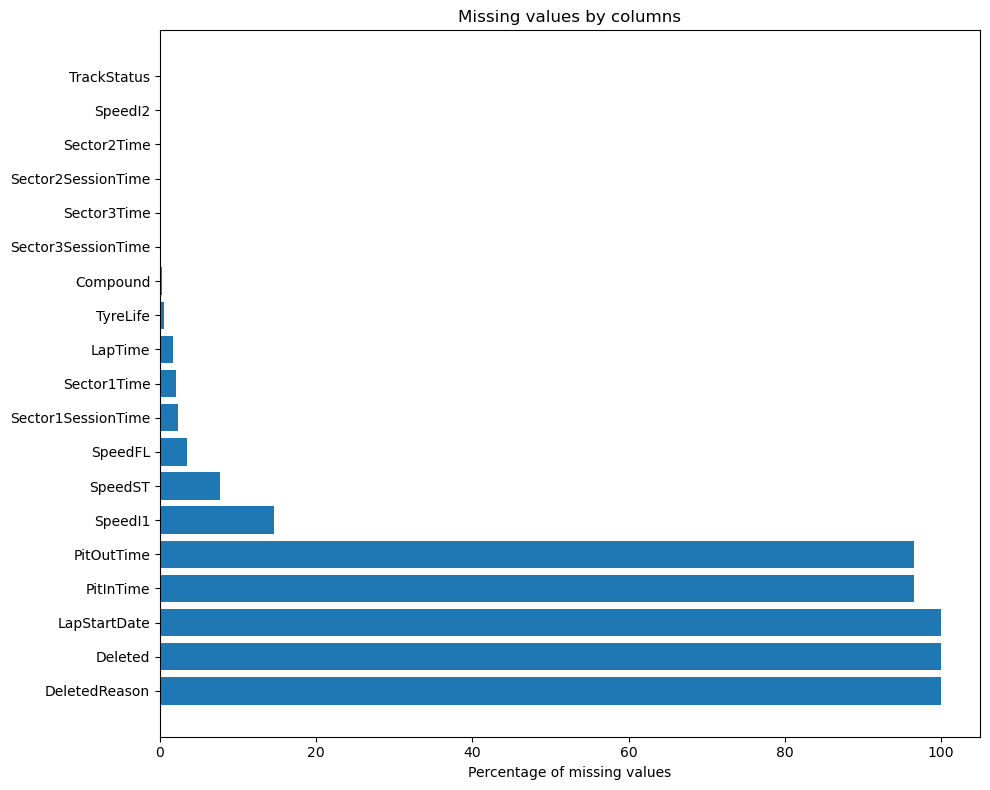

In [110]:
import matplotlib.pyplot as plt

missing_val_per = df_laps.isna().sum() * 100 / len(df_laps)
missing_val_per_df = pd.DataFrame({
    'column_name': df_laps.columns,
    'missing_percent': missing_val_per
})

missing_val_per_df = missing_val_per_df[missing_val_per_df.missing_percent > 0]
missing_val_per_df = missing_val_per_df.sort_values('missing_percent', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(missing_val_per_df['column_name'], missing_val_per_df['missing_percent'])
plt.xlabel('Percentage of missing values')
plt.title('Missing values by columns')
plt.tight_layout()
plt.show()

PitInTima and PitOutTime are features. Their missing values will be considered as feature.

In [111]:
df_laps.describe()

,DriverNumber,LapNumber,Stint,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,TyreLife,FreshTyre,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,Season,Round,NextPosition,NextLapProgress
count,113258.0,113258.0,113258.0,96707.0,113212.0,109290.0,104508.0,113258.00000,112656.0,113258.000000,0.0,113235.0,113258.0,0.0,0.0,113258.0,113258.000000,113258.0,113258.0,113258.0,113258.0
mean,27.597379,30.100214,2.103772,254.047184,243.382883,260.744149,291.953535,0.21383,14.356315,0.761500,<NA>,10.649667,9.694944,<NA>,<NA>,0.0,0.858429,2021.989228,9.950697,9.685382,0.058583
std,24.499549,18.17866,0.988769,50.101358,44.816276,38.782689,34.701998,0.41001,10.086435,0.426168,<NA>,104.289822,5.390942,<NA>,<NA>,0.0,0.348611,1.348148,6.34915,5.383979,0.428839
min,1.0,1.0,1.0,40.0,35.0,1.0,36.0,0.00000,1.0,0.000000,<NA>,1.0,1.0,<NA>,<NA>,0.0,0.000000,2020.0,0.0,1.0,-1.0
25%,10.0,15.0,1.0,217.0,220.0,245.0,287.0,0.00000,6.0,1.000000,<NA>,1.0,5.0,<NA>,<NA>,0.0,1.000000,2021.0,5.0,5.0,0.0
50%,20.0,29.0,2.0,272.0,253.0,272.0,298.0,0.00000,12.0,1.000000,<NA>,1.0,10.0,<NA>,<NA>,0.0,1.000000,2022.0,10.0,10.0,0.0
75%,44.0,44.0,3.0,289.0,275.0,286.0,308.0,0.00000,20.0,1.000000,<NA>,1.0,14.0,<NA>,<NA>,0.0,1.000000,2023.0,15.0,14.0,0.0
max,99.0,86.0,8.0,359.0,350.0,355.0,362.0,1.00000,77.0,1.000000,<NA>,6712.0,20.0,<NA>,<NA>,0.0,1.000000,2024.0,22.0,20.0,1.0


In [112]:
df_track_status.head()

,Time,Status,Message,Season,Round
0,0 days 00:07:56.420000,1,AllClear,2020,0
1,0 days 00:56:21.333000,2,Yellow,2020,0
2,0 days 00:56:30.327000,1,AllClear,2020,0
3,0 days 01:01:52.836000,2,Yellow,2020,0
4,0 days 01:02:31.497000,4,SCDeployed,2020,0


In [113]:
df_laps.tail()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,Season,Round,EventName,NextPosition,NextLapProgress
115269,0 days 02:30:38.845000,ZHO,24,0 days 00:01:38.309000,56,2,NaN,NaN,0 days 00:00:28.785000,0 days 00:00:41.893000,0 days 00:00:27.631000,0 days 02:29:29.336000,0 days 02:30:11.229000,0 days 02:30:38.860000,288,262,247,280,0.0,MEDIUM,22,1.0,Kick Sauber,0 days 02:29:00.536000,<NA>,1,15,<NA>,<NA>,0.0,1.0,2024,18,Singapore Grand Prix,15,0
115270,0 days 02:32:16.720000,ZHO,24,0 days 00:01:37.875000,57,2,NaN,NaN,0 days 00:00:28.834000,0 days 00:00:41.482000,0 days 00:00:27.559000,0 days 02:31:07.694000,0 days 02:31:49.176000,0 days 02:32:16.735000,292,264,249,281,0.0,MEDIUM,23,1.0,Kick Sauber,0 days 02:30:38.845000,<NA>,1,15,<NA>,<NA>,0.0,1.0,2024,18,Singapore Grand Prix,15,0
115271,0 days 02:33:54.478000,ZHO,24,0 days 00:01:37.758000,58,2,NaN,NaN,0 days 00:00:28.694000,0 days 00:00:41.621000,0 days 00:00:27.443000,0 days 02:32:45.429000,0 days 02:33:27.050000,0 days 02:33:54.493000,<NA>,265,249,284,0.0,MEDIUM,24,1.0,Kick Sauber,0 days 02:32:16.720000,<NA>,1,15,<NA>,<NA>,0.0,1.0,2024,18,Singapore Grand Prix,15,0
115272,0 days 02:35:32.237000,ZHO,24,0 days 00:01:37.759000,59,2,NaN,NaN,0 days 00:00:28.888000,0 days 00:00:41.402000,0 days 00:00:27.469000,0 days 02:34:23.381000,0 days 02:35:04.783000,0 days 02:35:32.252000,291,263,249,<NA>,0.0,MEDIUM,25,1.0,Kick Sauber,0 days 02:33:54.478000,<NA>,1,15,<NA>,<NA>,0.0,1.0,2024,18,Singapore Grand Prix,15,0
115273,0 days 02:37:12.067000,ZHO,24,0 days 00:01:39.830000,60,2,NaN,NaN,0 days 00:00:28.855000,0 days 00:00:42.461000,0 days 00:00:28.514000,0 days 02:36:01.107000,0 days 02:36:43.568000,0 days 02:37:12.082000,293,239,246,<NA>,0.0,MEDIUM,26,1.0,Kick Sauber,0 days 02:35:32.237000,<NA>,1,15,<NA>,<NA>,0.0,1.0,2024,18,Singapore Grand Prix,15,0


In [9]:
print(df_laps['Driver'].unique())
print('Number of unique values:' ,df_laps['Driver'].nunique())

['ALB' 'BOT' 'GAS' 'GIO' 'GRO' 'HAM' 'KVY' 'LAT' 'LEC' 'MAG' 'NOR' 'OCO'
 'PER' 'RAI' 'RIC' 'RUS' 'SAI' 'STR' 'VER' 'VET' 'HUL' 'AIT' 'FIT' 'ALO'
 'MAZ' 'MSC' 'TSU' 'KUB' 'ZHO' 'DEV' 'PIA' 'SAR' 'LAW' 'COL' 'BEA']
Number of unique values: 35


# First model

In [115]:
# !pip install lightgbm

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
# from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer

In [11]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

Class that we will use for droping unnecessary columns.

In [12]:
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        self.cols = cols

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(columns=self.cols, errors='ignore')

Class which we will use to convert sector times into amount of seconds.

In [13]:
class TimeConverter(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        self.cols = cols

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for col in self.cols:
            X[col] = pd.to_timedelta(X[col], errors='coerce').dt.total_seconds()
        return X

In [14]:
def na_to_binary(X):
    return X.notna().astype(int)

In [121]:
train_df = df_laps[df_laps['Season'] <= 2023]
y_train = train_df['NextLapProgress']

test_df = df_laps[df_laps['Season'] == 2024]
y_test = test_df['NextLapProgress']

In [15]:
numerical_cols = ['LapTime', 'LapNumber', 'Stint', 'TyreLife', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'SpeedI1',
                 'SpeedI2', 'SpeedFL', 'SpeedST', 'TrackStatus']
categorical_cols = ['Driver', 'Compound', 'Team', 'FreshTyre', 'EventName']

In [123]:
df_laps[numerical_cols].dtypes

LapTime        object
LapNumber       Int64
Stint           Int64
TyreLife        Int64
Sector1Time    object
Sector2Time    object
Sector3Time    object
SpeedI1         Int64
SpeedI2         Int64
SpeedFL         Int64
SpeedST         Int64
TrackStatus     Int64
dtype: object

In [124]:
df_laps.tail()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,Season,Round,EventName,NextPosition,NextLapProgress
115269,0 days 02:30:38.845000,ZHO,24,0 days 00:01:38.309000,56,2,NaN,NaN,0 days 00:00:28.785000,0 days 00:00:41.893000,0 days 00:00:27.631000,0 days 02:29:29.336000,0 days 02:30:11.229000,0 days 02:30:38.860000,288,262,247,280,0.0,MEDIUM,22,1.0,Kick Sauber,0 days 02:29:00.536000,<NA>,1,15,<NA>,<NA>,0.0,1.0,2024,18,Singapore Grand Prix,15,0
115270,0 days 02:32:16.720000,ZHO,24,0 days 00:01:37.875000,57,2,NaN,NaN,0 days 00:00:28.834000,0 days 00:00:41.482000,0 days 00:00:27.559000,0 days 02:31:07.694000,0 days 02:31:49.176000,0 days 02:32:16.735000,292,264,249,281,0.0,MEDIUM,23,1.0,Kick Sauber,0 days 02:30:38.845000,<NA>,1,15,<NA>,<NA>,0.0,1.0,2024,18,Singapore Grand Prix,15,0
115271,0 days 02:33:54.478000,ZHO,24,0 days 00:01:37.758000,58,2,NaN,NaN,0 days 00:00:28.694000,0 days 00:00:41.621000,0 days 00:00:27.443000,0 days 02:32:45.429000,0 days 02:33:27.050000,0 days 02:33:54.493000,<NA>,265,249,284,0.0,MEDIUM,24,1.0,Kick Sauber,0 days 02:32:16.720000,<NA>,1,15,<NA>,<NA>,0.0,1.0,2024,18,Singapore Grand Prix,15,0
115272,0 days 02:35:32.237000,ZHO,24,0 days 00:01:37.759000,59,2,NaN,NaN,0 days 00:00:28.888000,0 days 00:00:41.402000,0 days 00:00:27.469000,0 days 02:34:23.381000,0 days 02:35:04.783000,0 days 02:35:32.252000,291,263,249,<NA>,0.0,MEDIUM,25,1.0,Kick Sauber,0 days 02:33:54.478000,<NA>,1,15,<NA>,<NA>,0.0,1.0,2024,18,Singapore Grand Prix,15,0
115273,0 days 02:37:12.067000,ZHO,24,0 days 00:01:39.830000,60,2,NaN,NaN,0 days 00:00:28.855000,0 days 00:00:42.461000,0 days 00:00:28.514000,0 days 02:36:01.107000,0 days 02:36:43.568000,0 days 02:37:12.082000,293,239,246,<NA>,0.0,MEDIUM,26,1.0,Kick Sauber,0 days 02:35:32.237000,<NA>,1,15,<NA>,<NA>,0.0,1.0,2024,18,Singapore Grand Prix,15,0


In [16]:
cols_to_drop = ['Time', 'DriverNumber', 'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime', 'IsPersonalBest', 
                'LapStartTime', 'LapStartDate', 'Position', 'Deleted', 'DeletedReason', 'FastF1Generated', 'IsAccurate',
                'Season', 'Round', 'NextPosition']
# EventName

In [17]:
binary_features = ['PitInTime', 'PitOutTime']

In [18]:
preprocessor = Pipeline(steps=[
    ('drop_cols', DropColumns(cols_to_drop)),
    ('convertor', TimeConverter([
        'LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time'
    ])),
    ('preprocess', ColumnTransformer(
        transformers=[
            
            ('num', Pipeline([
                ('imputer', SimpleImputer(strategy='mean')),
                ('scaler', StandardScaler())
            ]), numerical_cols),
            
            ('cat', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore'))
            ]), categorical_cols),
            
            ('bin_transform', Pipeline([
                ('to_binary', FunctionTransformer(na_to_binary))
            ]), binary_features)
        ]
    ))
])

In [19]:
pipeline_lr_I = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", LogisticRegression(
        max_iter=2000,
        class_weight='balanced',
        n_jobs=-1
    ))
])

pipeline_rf_I = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=300,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ))
])

pipeline_lgbm_I = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", LGBMClassifier(
        objective='multiclass',
        num_class=3,
        class_weight='balanced',
        n_estimators=300,
        learning_rate=0.1,
        n_jobs=-1
    ))
])

In [20]:
pipelines = {
    "Logistic Regression": pipeline_lr_I,
    "Random Forest": pipeline_rf_I,
    "LightGBM": pipeline_lgbm_I
}

### Evaluate function

In [22]:
def evaluate_classifier(model_name, y_true, y_pred, y_proba=None):
    print('==========', model_name, '==========')

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

    print(f'Accuracy      : {acc:.4f}')
    print(f'Precision(m)  : {prec:.4f}')
    print(f'Recall(m)     : {rec:.4f}')
    print(f'F1-score(m)   : {f1:.4f}')

    if y_proba is not None:
        # multiclass ROC-AUC (One-vs-Rest)
        roc = roc_auc_score(
            y_true,
            y_proba,
            multi_class='ovr',
            average='macro'
        )
        print(f'ROC-AUC(m)    : {roc:.4f}')

    print('\nConfusion matrix:')
    print(confusion_matrix(y_true, y_pred))

    print('\nClassification report:')
    print(classification_report(y_true, y_pred, zero_division=0))

    print('\n')

In [24]:
for name, pipeline in pipelines.items():
    print(f"\nTraining {name} ...")

    pipeline.fit(train_df, y_train)

    y_pred = pipeline.predict(test_df)

    y_proba = pipeline.predict_proba(test_df)

    evaluate_classifier(
        model_name=name,
        y_true=y_test,
        y_pred=y_pred,
        y_proba=y_proba
    )

### Time-based split - Expanding window

This will be done like: train -> test <br>
2020 -> 2021<br>
2020 2021 -> 2022<br>
2020 2021 2022 -> 2023<br>
2020 2021 2022 2023 -> 2024<br>

Numericals and categorical calls remain same, because we didn't create new fatures. Also, columns to be dropped.

In [28]:
from sklearn.base import clone

seasons = sorted(df_laps['Season'].unique())

for i in range(1, len(seasons)):
    train_seasons = seasons[:i]
    test_season = seasons[i]

    train_df = df_laps[df_laps['Season'].isin(train_seasons)]
    test_df = df_laps[df_laps['Season'] == test_season]

    X_train = train_df[numerical_cols + categorical_cols + binary_features]
    y_train = train_df['NextLapProgress']

    X_test = test_df[numerical_cols + categorical_cols + binary_features]
    y_test = test_df['NextLapProgress']

    models = clone(pipelines)

    # Maybe this colud go in method?
    print('=========== ITERATION ', i, '===========' )
    for name, model in models.items():
        print(f"\nTraining {name} ...")
    
        model.fit(X_train, y_train)
    
        y_pred = model.predict(X_test)
    
        y_proba = model.predict_proba(X_test)
    
        evaluate_classifier(
            model_name=name,
            y_true=y_test,
            y_pred=y_pred,
            y_proba=y_proba
        )

=========== ITERATION  1 ===========

Training Logistic Regression ...
========== Logistic Regression ==========
Accuracy      : 0.5350
Precision(m)  : 0.4099
Recall(m)     : 0.5040
F1-score(m)   : 0.3922
ROC-AUC(m)    : 0.6730

Confusion matrix:
[[  638   351   343]
 [ 2409 11109  6883]
 [  306  1021  1268]]

Classification report:
              precision    recall  f1-score   support

        -1.0       0.19      0.48      0.27      1332
         0.0       0.89      0.54      0.68     20401
         1.0       0.15      0.49      0.23      2595

    accuracy                           0.53     24328
   macro avg       0.41      0.50      0.39     24328
weighted avg       0.77      0.53      0.61     24328




Training Random Forest ...
========== Random Forest ==========
Accuracy      : 0.8503
Precision(m)  : 0.6892
Recall(m)     : 0.4334
F1-score(m)   : 0.4534
ROC-AUC(m)    : 0.6928

Confusion matrix:
[[  399   930     3]
 [  113 20270    18]
 [   18  2559    18]]

Classification repo

In [132]:
df_track_status = df_track_status[['Status', 'Message']].drop_duplicates().reset_index(drop=True)
df_track_status[['Status']].drop_duplicates()
df_track_status[['Message']].drop_duplicates()

,Message
0,AllClear
1,Yellow
2,SCDeployed
3,Red
4,VSCDeployed
5,VSCEnding


In [133]:
df_laps['TrackStatus'].unique()

<IntegerArray>
[   1,   12,  124,    4,   41,  412,   24,   21,   14,   45,  451,   51,  167,
   71,   16,  671, <NA>,    2,  712, 1672, 6712,   26, 2671,  267,  126,    6,
   15, 1264,  216,   64,  264, 1267,  512,   67,  125,  164, 2167,  214, 1265,
   65,  265,  514,  651, 1254]
Length: 44, dtype: Int64

This is bitmask. I will drop all missing values because it is like ~0,02% of data.

In [134]:
df_laps = df_laps[df_laps['TrackStatus'].notna()]

In [135]:
TRACK_STATUS_BITS = {
    1:  'AllClear',
    2:  'Yellow',
    4:  'SafetyCar',
    8:  'VSC',
    16: 'RedFlag',
    32: 'FormationFlag',
    64: 'SessionEnd'
}

for bit, name in TRACK_STATUS_BITS.items():
    df_laps[f"Is{name}"] = ((df_laps['TrackStatus'] & bit) > 0).astype(int)

Creating feature for pit stop. That is the one of main reasons for position change.

In [136]:
df_laps['IsPitInLap'] = df_laps['PitInTime'].notna().astype(int)
df_laps['IsPitOutLap'] = df_laps['PitOutTime'].notna().astype(int)

In [137]:
df_laps.tail()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,Season,Round,EventName,NextPosition,NextLapProgress,IsAllClear,IsYellow,IsSafetyCar,IsVSC,IsRedFlag,IsFormationFlag,IsSessionEnd,IsPitInLap,IsPitOutLap
115269,0 days 02:30:38.845000,ZHO,24,0 days 00:01:38.309000,56,2,NaN,NaN,0 days 00:00:28.785000,0 days 00:00:41.893000,0 days 00:00:27.631000,0 days 02:29:29.336000,0 days 02:30:11.229000,0 days 02:30:38.860000,288,262,247,280,0.0,MEDIUM,22,1.0,Kick Sauber,0 days 02:29:00.536000,<NA>,1,15,<NA>,<NA>,0.0,1.0,2024,18,Singapore Grand Prix,15,0,1,0,0,0,0,0,0,0,0
115270,0 days 02:32:16.720000,ZHO,24,0 days 00:01:37.875000,57,2,NaN,NaN,0 days 00:00:28.834000,0 days 00:00:41.482000,0 days 00:00:27.559000,0 days 02:31:07.694000,0 days 02:31:49.176000,0 days 02:32:16.735000,292,264,249,281,0.0,MEDIUM,23,1.0,Kick Sauber,0 days 02:30:38.845000,<NA>,1,15,<NA>,<NA>,0.0,1.0,2024,18,Singapore Grand Prix,15,0,1,0,0,0,0,0,0,0,0
115271,0 days 02:33:54.478000,ZHO,24,0 days 00:01:37.758000,58,2,NaN,NaN,0 days 00:00:28.694000,0 days 00:00:41.621000,0 days 00:00:27.443000,0 days 02:32:45.429000,0 days 02:33:27.050000,0 days 02:33:54.493000,<NA>,265,249,284,0.0,MEDIUM,24,1.0,Kick Sauber,0 days 02:32:16.720000,<NA>,1,15,<NA>,<NA>,0.0,1.0,2024,18,Singapore Grand Prix,15,0,1,0,0,0,0,0,0,0,0
115272,0 days 02:35:32.237000,ZHO,24,0 days 00:01:37.759000,59,2,NaN,NaN,0 days 00:00:28.888000,0 days 00:00:41.402000,0 days 00:00:27.469000,0 days 02:34:23.381000,0 days 02:35:04.783000,0 days 02:35:32.252000,291,263,249,<NA>,0.0,MEDIUM,25,1.0,Kick Sauber,0 days 02:33:54.478000,<NA>,1,15,<NA>,<NA>,0.0,1.0,2024,18,Singapore Grand Prix,15,0,1,0,0,0,0,0,0,0,0
115273,0 days 02:37:12.067000,ZHO,24,0 days 00:01:39.830000,60,2,NaN,NaN,0 days 00:00:28.855000,0 days 00:00:42.461000,0 days 00:00:28.514000,0 days 02:36:01.107000,0 days 02:36:43.568000,0 days 02:37:12.082000,293,239,246,<NA>,0.0,MEDIUM,26,1.0,Kick Sauber,0 days 02:35:32.237000,<NA>,1,15,<NA>,<NA>,0.0,1.0,2024,18,Singapore Grand Prix,15,0,1,0,0,0,0,0,0,0,0


In [138]:
df_laps.dtypes

Time                   object
Driver                 object
DriverNumber            Int64
LapTime                object
LapNumber               Int64
Stint                   Int64
PitOutTime             object
PitInTime              object
Sector1Time            object
Sector2Time            object
Sector3Time            object
Sector1SessionTime     object
Sector2SessionTime     object
Sector3SessionTime     object
SpeedI1                 Int64
SpeedI2                 Int64
SpeedFL                 Int64
SpeedST                 Int64
IsPersonalBest        float64
Compound               object
TyreLife                Int64
FreshTyre             float64
Team                   object
LapStartTime           object
LapStartDate            Int64
TrackStatus             Int64
Position                Int64
Deleted                 Int64
DeletedReason           Int64
FastF1Generated       float64
IsAccurate            float64
Season                  Int64
Round                   Int64
EventName 